#The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
#Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as date
%matplotlib inline

In [3]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Imorting first data set(Play store Data )
playstore_df=pd.read_csv('/content/drive/MyDrive/Copy of Play Store Data.csv')

In [5]:
#Importing second data set(User Review)
df_review=pd.read_csv('/content/drive/MyDrive/Copy of User Reviews.csv')

# **Exploring and Understanding the Playstore dataset**

In [6]:
playstore_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [7]:
# Filling the space between the column names with "_" for ease of use in the playstore_df.
playstore_df.columns = playstore_df.columns.str.replace(" ","_")
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

#There are more than a million application which are available in google playstore.This dataset contain data of 10,000 apps from google playstore.

#The Play Store dataset contain following features:

**App**- Name of the apps.

**Category**- Category under which the app falls.

**Rating**- Applications rating in playstore.

**Reviews**- Number of reviews given to apps.

**Size**- Size of the apps.

**Installs**- Number of installs of the apps.

**Type**- If the app is free or paid.

**Price**- Price of the apps.

**Content_Rating**- Appropriate target audience of the apps.

**Genres**- Genres under which the app fall.

**Last_updated**- Date when the app last updated.

**Current_Ver**- Current version of the apps.

**Android_Ver**- Minimum android version required for the apps to run

In [8]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
#Number of rows and columns in playstore dataset
playstore_df.shape

(10841, 13)

In [10]:
  playstore_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#list of columns in Playstore Dataset
print(list(playstore_df.columns))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver']


In [12]:
#creation of a Function for Null values Information 
def Playstore_df_info():
  Platstore_info_df = pd.DataFrame(index=playstore_df.columns)
  Platstore_info_df['Datatypes'] =  playstore_df.dtypes
  Platstore_info_df['Count of non-null values'] = playstore_df.count()
  Platstore_info_df['NaN values'] = playstore_df.isnull().sum()
  Platstore_info_df['% NaN Values'] = (Platstore_info_df['NaN values']/len(playstore_df)).round(4)*100 
  Platstore_info_df['Unique_count'] = playstore_df.nunique()
  return Platstore_info_df
Playstore_df_info()

,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
App,object,10841,0,0.00,9660
Category,object,10841,0,0.00,34
Rating,float64,9367,1474,13.60,40
Reviews,object,10841,0,0.00,6002
Size,object,10841,0,0.00,462
Installs,object,10841,0,0.00,22
Type,object,10840,1,0.01,3
Price,object,10841,0,0.00,93
Content_Rating,object,10840,1,0.01,6
Genres,object,10841,0,0.00,120


#From the above, we understand that except for Rating columns, we are having a good dataset.

**The number of null values are:**

1.**Rating  maximum (1474) null values which contributes 13.60% of the data.**

2.**Type has 1 null value which contributes 0.01% of the data.**

3.**Content_Rating has 1 null value which contributes 0.01% of the data.**

4.**Current_Ver has 8 null values which contributes 0.07% of the data.**

6.**Android_Ver has 3 null values which contributes 0.03% of the data.**

8.**We know that there is only one feature with numeric type i.e. Rating.**

9.**Unique counts of Type and Content ratings are very small i.e. 3 and 6 respectively**

# **Exploring User review Dataset**

In [13]:
df_review.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


#The User Review dataset contain following features:

**App** - The name of the application.

**Translated_Review** - what the users feedback is about the application.

**Sentiment** - tells us about a view or opinion of the user w.r.t. the application.

**Sentiment_Polarity** - Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the application.

**Sentiment_Subjectivity** - It refers to the text that contains text which is usually expressed by a human having typical moods, emotions, and feelings. Mostly it is a public opinion and not a factual information.

In [14]:
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [15]:
df_review.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [16]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [17]:
df_review.shape

(64295, 5)

In [18]:
 df_review.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [19]:
#creation of Function for Null values Information 
def User_review_info():
  URinfo_df = pd.DataFrame(index=df_review.columns)
  URinfo_df['Count of non-null values'] = df_review.count()
  URinfo_df['NaN values'] = df_review.isnull().sum()
  URinfo_df['% NaN Values'] = (URinfo_df['NaN values']/len(df_review)).round(4)*100 
  URinfo_df['Unique_count'] = df_review.nunique()
  return URinfo_df
User_review_info()

,Count of non-null values,NaN values,% NaN Values,Unique_count
App,64295,0,0.00,1074
Translated_Review,37427,26868,41.79,27994
Sentiment,37432,26863,41.78,3
Sentiment_Polarity,37432,26863,41.78,5410
Sentiment_Subjectivity,37432,26863,41.78,4474


* From the above, we understand that **only for App column**, we are having a good dataset.
* There so many of null values in dataset, we need to take care of that part.

* The number of null values are:
  1. **Translated_Review has 26868 null values which contributes 41.79% of the data.**
  2. **Sentiment has 26863 null values which contributes 41.78% of the data.**
  3. **Sentiment_Polarity has 26863 null values which contributes 41.78% of the data.**
  4. **Sentiment_Subjectivity has 26863 null values which contributes 41.78% of the data.**

# **Data Cleaning**

In [20]:
# lets create new user review df, as we going to drop all null values
#dropping all the null values from User review dataset columns
new_df_reviews = df_review.dropna(subset=["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"],how="all")

In [21]:
new_df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37432 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37432 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [22]:
new_df_reviews.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [23]:
#so in Translated_Review column we have 5 null values
#lets check which are these
new_df_reviews[new_df_reviews.Translated_Review.isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [24]:
#Dropping these null values
new_df_reviews=new_df_reviews.dropna(subset= ["Translated_Review"],how = "all")
new_df_reviews.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

From the above output we can infer that we have removed all the NaN values from the user_review data frame.

In [25]:
# Handling missing data from the first dataset(playstore data)
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

**so we have maximum null values in Rating column which are 1474 
and some null values in Current_ver and Andriod_ver columns**

We cannot drop these NaN values of Rating Column because if we do this we will loose a lots of useful data

So in order to get sentiment or translated review info for the apps from the user_review DF so that we can fill these NaN values based on users sentiment

In [26]:
#creating copies of the datasets
new_playstore_df_copy = playstore_df.copy()
new_df_reviews_copy = new_df_reviews.copy()

In [27]:
#Merging both Dataset
# Lets Merge two DataFrame to check the common apps 
merged_playstore_reviews = pd.merge(new_playstore_df_copy, new_df_reviews_copy)

In [28]:
merged_playstore_reviews.shape

(72605, 17)

In [29]:
merged_playstore_reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [30]:
#number of unique values(app)
#in playstore dataset
print(playstore_df.App.nunique())
#in user review dataset
print(new_df_reviews.App.nunique())
#in merged dataset
print(merged_playstore_reviews.App.nunique())

9660
865
816


From the Above output we can see that we have 9660 unique Apps in Playstore DF.865 unique Apps in UserReview DF.

and we have only 816 unique apps in Merged DF ,so we can conclude from this that we have only 816 Common Apps between Two DF's.

In [31]:
merged_playstore_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72605 entries, 0 to 72604
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     72605 non-null  object 
 1   Category                72605 non-null  object 
 2   Rating                  72566 non-null  float64
 3   Reviews                 72605 non-null  object 
 4   Size                    72605 non-null  object 
 5   Installs                72605 non-null  object 
 6   Type                    72605 non-null  object 
 7   Price                   72605 non-null  object 
 8   Content_Rating          72605 non-null  object 
 9   Genres                  72605 non-null  object 
 10  Last_Updated            72605 non-null  object 
 11  Current_Ver             72605 non-null  object 
 12  Android_Ver             72605 non-null  object 
 13  Translated_Review       72605 non-null  object 
 14  Sentiment               72605 non-null

In [32]:
merged_playstore_reviews.isnull().sum()

App                        0
Category                   0
Rating                    39
Reviews                    0
Size                       0
Installs                   0
Type                       0
Price                      0
Content_Rating             0
Genres                     0
Last_Updated               0
Current_Ver                0
Android_Ver                0
Translated_Review          0
Sentiment                  0
Sentiment_Polarity         0
Sentiment_Subjectivity     0
dtype: int64

from above values we can see that we have 39 missing values in **Rating** column

In [33]:
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [34]:
merged_playstore_reviews.Sentiment.unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

so for filling these missing values in Rating we will just check the Sentiment column 

In [35]:
#finding the number of Null values of Rating where sentiments are positive
num_positive = len(merged_playstore_reviews[(merged_playstore_reviews.Rating.isnull()) & (merged_playstore_reviews["Sentiment"].str.contains("Positive"))])
print(num_positive)
#finding the number of Null values of Rating where sentiments are Negative
num_negative = len(merged_playstore_reviews[(merged_playstore_reviews.Rating.isnull()) & (merged_playstore_reviews["Sentiment"].str.contains("Negative"))])
print(num_negative)
#finding the number of Null values of Rating where sentiments are Neutral
num_neutral = len(merged_playstore_reviews[(merged_playstore_reviews.Rating.isnull()) & (merged_playstore_reviews["Sentiment"].str.contains("Neutral"))])
print(num_neutral)

31
4
4


# From above numbers we can see that maximum Ratings are null where Sentiment is Positive ,so from this we can conclude that missing values of rating can be BETWEEN 4-5

In [36]:
#mode of Ratings
mode_value=playstore_df.Rating.mode()
mode_value

0    4.4
dtype: float64

In [37]:
#replacing all the NAN with mode value of Rating
playstore_df['Rating'].fillna(4.4,inplace=True)


In [38]:
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    1
Genres            0
Last_Updated      0
Current_Ver       8
Android_Ver       3
dtype: int64

From above information we can see that there is no null value in Rating column but in four columns(Type,Content_Rating,current_ver,Android_ver) there are few null values present

In [39]:
#dropping null values from remaining columns 
new_playstore_df=playstore_df.dropna(subset= ["Type","Content_Rating","Current_Ver","Android_Ver"],how = "any")

In [40]:
new_playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

**So from this output everything looks great there is no null value present in our playstore dataset**

In [41]:
#lets start with Category column
playstore_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In **Category** column there is category name "1.9" so it's looks like a wrong data So we have to remove it

In [42]:
playstore_df=playstore_df.drop(playstore_df.index[playstore_df['Category']=='1.9'])

In [43]:
playstore_df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

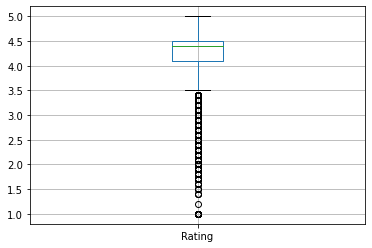

In [44]:
playstore_df.boxplot()

**From above Boxplot Everything looking great there is no outliers in "Rating"** 

###Lets check for any irrelevant data in any of the Columns/Rows

1.  **Installs** should be numeric type. It has '+' & ',' characters present in it, which needs to be removed.
2.**Reviwes** should be numeric type.
3.Replacing "M" and "k" into numeric type in **Size** column
4.We have to convert **Price** column into float type by removing "$"  
5. **Current_Ver** should be numeric type.
6. **Android_Ver** should be numeric type.
7.datatype of **Last_updated** should be date time.

In [45]:
#removing "+" and "&" from Installs column and changing into int data type
playstore_df['Installs'] = playstore_df['Installs'].str.replace('+','')
playstore_df['Installs'] = playstore_df['Installs'].str.replace(',','')
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x : int(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [46]:
playstore_df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

# **Reviews** should be numeric type.

In [47]:
#checking Review column
playstore_df['Reviews'].describe()

count     10840
unique     6001
top           0
freq        596
Name: Reviews, dtype: object

In [48]:
#replacing object type value in int
playstore_df['Reviews']=playstore_df['Reviews'].replace('3.0M',3000000)

In [49]:
#converting Reviews to integer data type
playstore_df['Reviews']=playstore_df['Reviews'].astype(int)

In [50]:
playstore_df['Reviews'].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

# **Size** should be numeric(Float) type. In the given dataset it has 'M' and 'k' strings present in it. We need to convert these into numbers.

In [51]:
#Unique values in "Size" Column
playstore_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [52]:
# In the Size column replacing "M" with 000000 and "k" with 000 for our ease and analysis purpose.
playstore_df['Size'] = playstore_df.Size.str.replace("M","000000")
playstore_df['Size'] = playstore_df.Size.str.replace("k","000")
playstore_df['Size'] = playstore_df.Size.str.replace("Varies with device","000")

playstore_df['Size'] = playstore_df['Size'].apply(lambda x : float(x))

In [53]:
playstore_df['Size'].describe()

count    1.084000e+04
mean     1.651624e+07
std      2.320041e+07
min      0.000000e+00
25%      3.100000e+00
50%      2.675000e+05
75%      2.600000e+07
max      1.000000e+08
Name: Size, dtype: float64

# **Price** should be numeric type. we have to replace  '$' character present in it

In [54]:
#Removing '$' symbol from Price column
playstore_df['Price']=playstore_df['Price'].str.replace('$','')
playstore_df['Price'] = playstore_df['Price'].apply(lambda x : float(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [55]:
playstore_df['Price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

# Convering **Current_Ver** into numeric type.

In [56]:
playstore_df['Current_Ver']

0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10836                  1.48
10837                   1.0
10838                   1.0
10839    Varies with device
10840    Varies with device
Name: Current_Ver, Length: 10840, dtype: object

## **There are some string type data is present in "Current version" and "Android version" columns so we have to remove it**

In [57]:
#replacing object data type to nan
playstore_df['Current_Ver'] = playstore_df.Size.replace("Varies with device",np.nan)
playstore_df['Current_Ver'] =playstore_df['Current_Ver'].astype(float)

In [58]:
playstore_df['Android_Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [59]:
#replacing all the value of Android version into single digit(float)
playstore_df['Android_Ver'].replace({'4.4W and up':'4.4','Varies with device':'1.0'},inplace=True)
playstore_df['Android_Ver'].replace({a: '1.0' for a in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
playstore_df['Android_Ver'].replace({a: '2.0' for a in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
playstore_df['Android_Ver'].replace({a: '3.0' for a in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
playstore_df['Android_Ver'].replace({a: '4.0' for a in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
playstore_df['Android_Ver'].replace({a: '5.0' for a in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
playstore_df['Android_Ver'].replace({a: '6.0' for a in ['6.0 and up']},inplace=True)
playstore_df['Android_Ver'].replace({a: '7.0' for a in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
playstore_df['Android_Ver'].replace({a: '8.0' for a in ['8.0 and up']},inplace=True)

In [60]:
playstore_df['Android_Ver'].unique()

array(['4.0', '2.0', '3.0', '1.0', '5.0', '6.0', '7.0', '8.0', nan],
      dtype=object)

In [61]:
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       2
dtype: int64

In [62]:
playstore_df.dropna(inplace=True)

In [63]:
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

converting Last updated column from playstore df into datetime

In [64]:
playstore_df.Last_Updated.unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [65]:
# Converting the Object Type to datetime Type.
playstore_df['Last_Updated'] = pd.to_datetime(playstore_df['Last_Updated'])
playstore_df['Last_Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last_Updated, Length: 10837, dtype: datetime64[ns]

So now our both data set are free from Error and Nan values 
# **therefore now we can move on to next part that is Analysis through visualization**

# Let us check co-relation in first playstore dataframes.

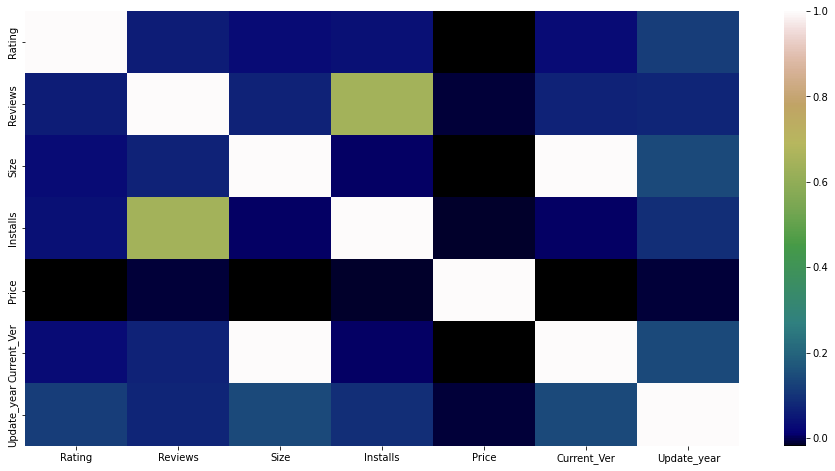

In [101]:
# Heat map for df_apps
plt.figure(figsize=(16,8))
corr= playstore_df.corr()
sns.heatmap(corr,cmap='gist_earth')
plt.show()

# **1. Which category of App is most popular on Play store?**

Text(0, 0.5, 'number')

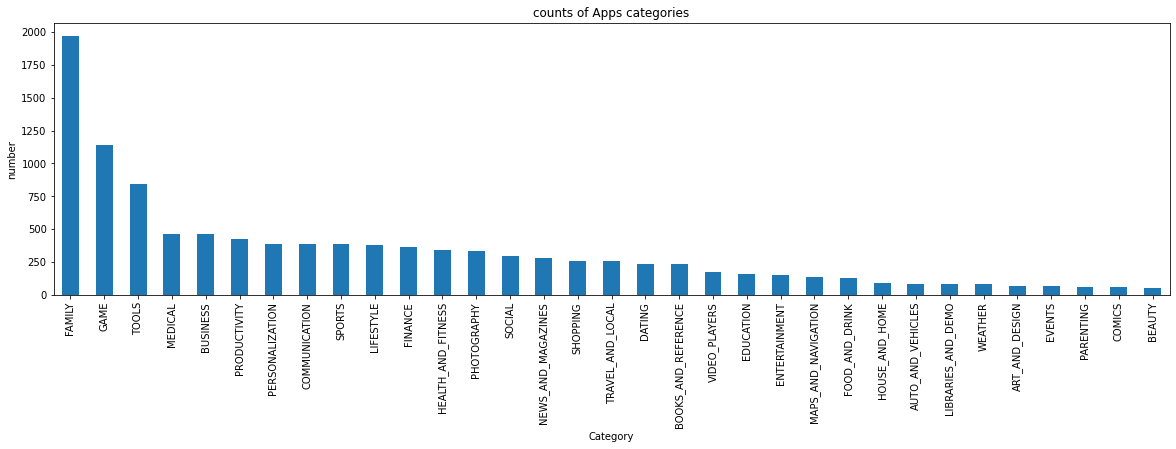

In [66]:
#ploting a bar graph for finding which category has highest count of apps
category_bar=playstore_df['Category'].value_counts().plot.bar(figsize=(20,5))
category_bar.set_title('counts of Apps categories')
category_bar.set_xlabel('Category')
category_bar.set_ylabel('number')

# **2.Finding distribution  and average of rating**

Text(0.5, 0, 'Rating')

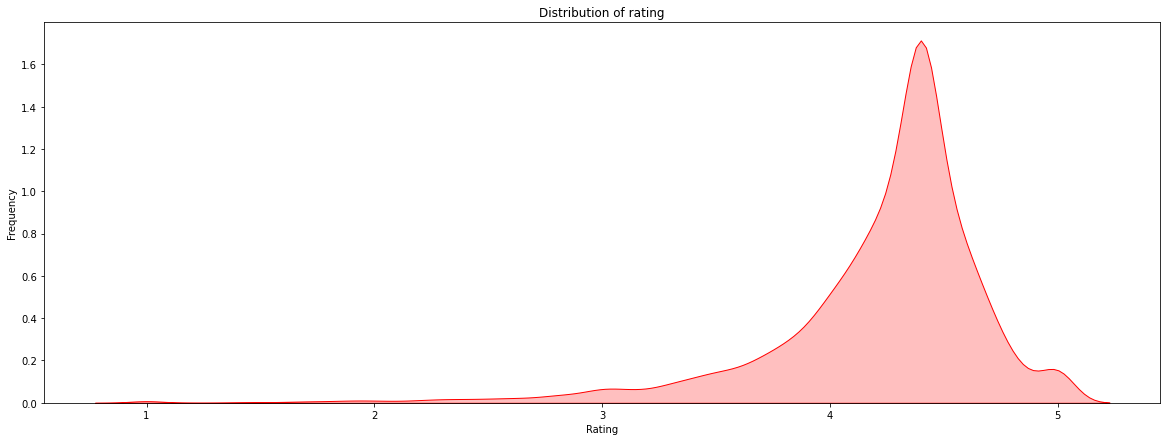

In [67]:
#finding distribution of rating
plt.figure(figsize=(20,7)) 
b= sns.kdeplot(playstore_df['Rating'],color='r',shade=True)
b.set_title('Distribution of rating')
b.set_ylabel('Frequency')
b.set_xlabel('Rating')

# **3.Finding which category have max installs**

In [68]:
#grouping avg install for each Category of apps
df_install=playstore_df.groupby(['Category'])['Installs'].mean()

Text(0, 0.5, 'Installs')

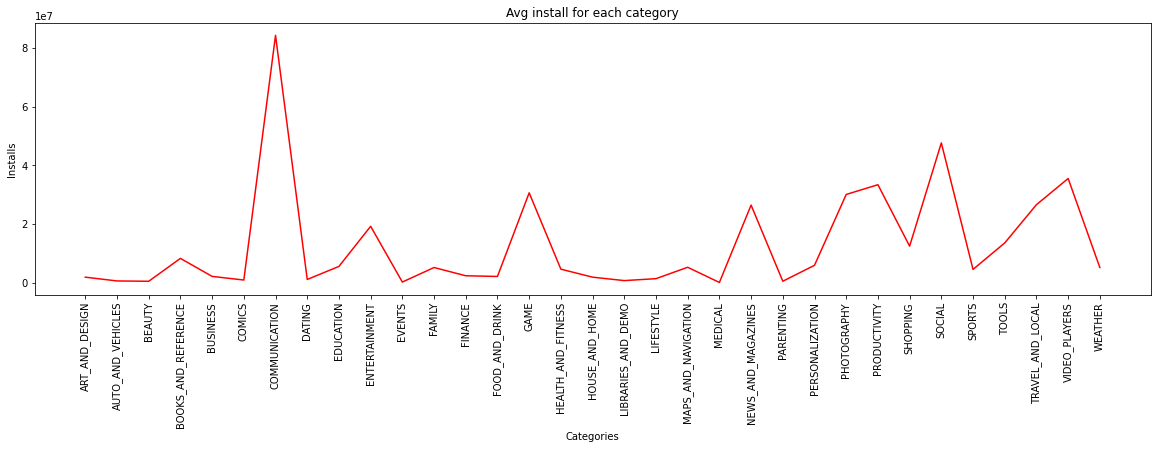

In [69]:
#finding which Category has maximum app install
plt.figure(figsize=(20,5))
plt.plot(df_install, color='r')
plt.xticks(rotation=90)
plt.title('Avg install for each category')
plt.xlabel('Categories')
plt.ylabel('Installs')

# **4.Finding which type app have more rating(Free vs Paid)**

In [70]:
#grouping rating and type(Free and Paid)
rating_free_paid=playstore_df.groupby(['Rating'])['Type'].value_counts().unstack()

Text(0, 0.5, 'counts of type')

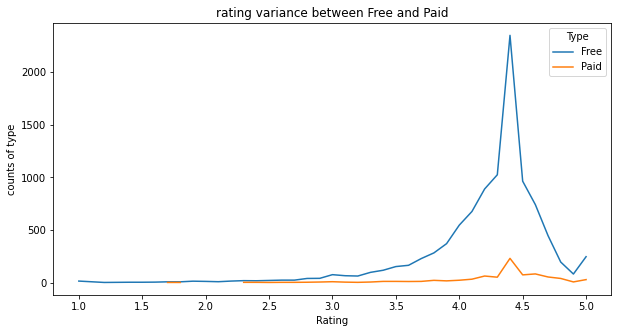

In [71]:
#comparing using multiline graph
rating_free_paid.plot(figsize=(10,5))
plt.title('rating variance between Free and Paid')
plt.xlabel('Rating')
plt.ylabel('counts of type')

# **5.Finding which App Category have maximum average reviews**

Text(0.5, 0, 'Category')

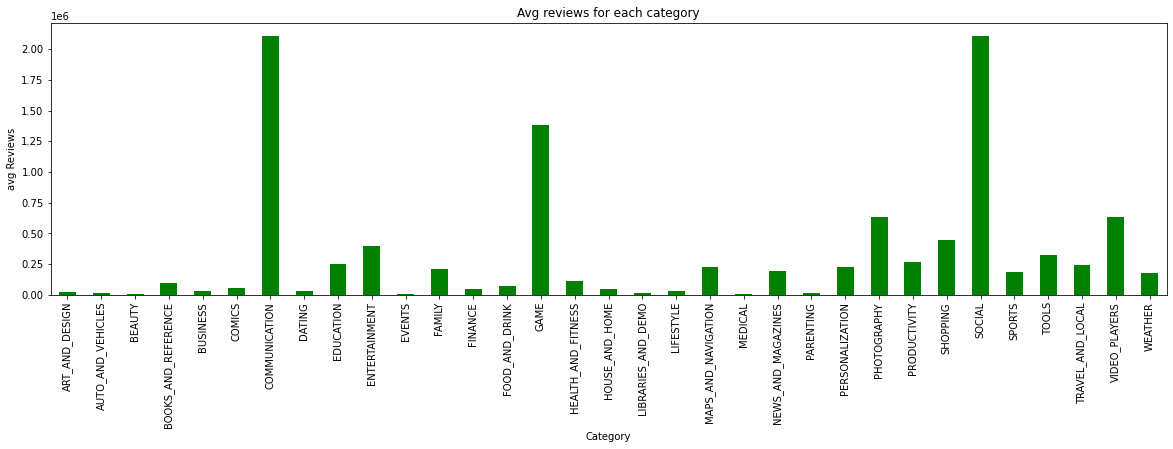

In [72]:
#Average rating for each category
avg_rating =playstore_df.groupby(['Category'])['Reviews'].mean()
b=avg_rating.plot.bar(figsize=(20,5),color='g')
b.set_title('Avg reviews for each category')
b.set_ylabel('avg Reviews')
b.set_xlabel('Category')

# **6.Finding top 10 genres of apps**

In [73]:
x=playstore_df['Genres'].value_counts().reset_index()[:10]
x.rename(columns={'index':'Genres','Genres':'Index'},inplace=True)
y=playstore_df['Genres'].value_counts().reset_index()[:10]
y.rename(columns={'index':'Genres','Genres':'Index'},inplace=True)

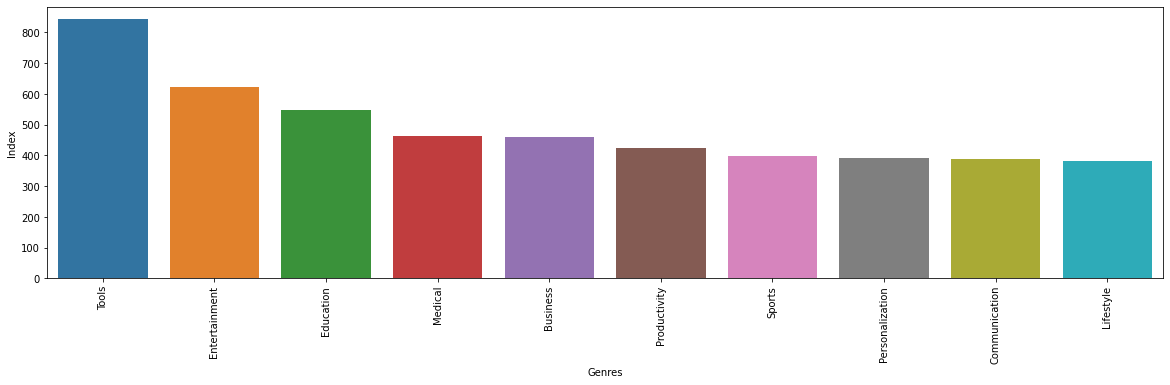

In [74]:
plt.figure(figsize=(20,5))
fig=sns.barplot(x=x['Genres'],y=y['Index']);
plt.xticks(rotation=90);

# **7.Apps for each age group(content rating)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


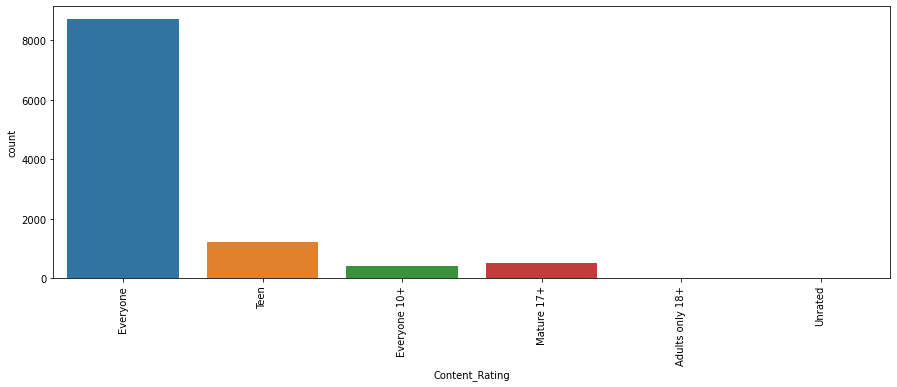

In [79]:
plt.figure(figsize=(15,5))
sns.countplot(playstore_df['Content_Rating'])
plt.xticks(rotation=90)
plt.show()

# **8.Top 10 app whose price is maximum**

In [84]:
#finding app which have maximum price
top_paid_apps = playstore_df[playstore_df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(10) #sorting prices

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


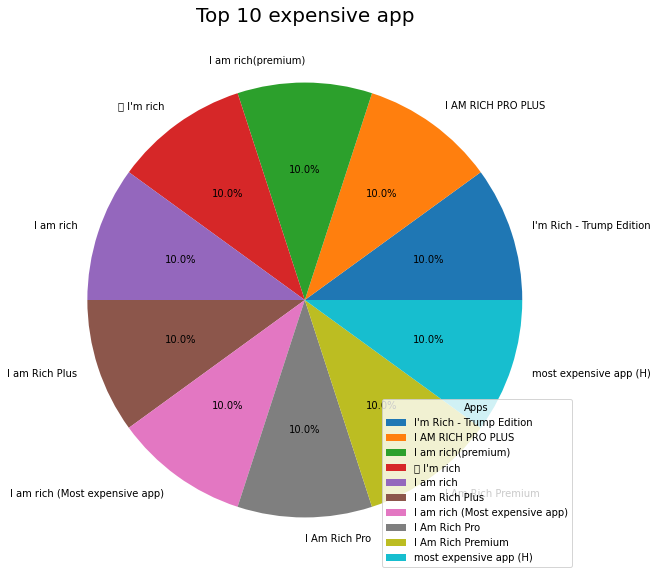

In [85]:
plt.figure(figsize=(15,10))
plt.pie(top_paid_apps.Price, explode=None, labels=top_paid_apps.App, autopct='%1.1f%%', startangle=0)
plt.title('Top 10 expensive app',size = 20)
plt.legend(top_paid_apps.App, loc="lower right", title="Apps")

# **9.Apps for each age group(content rating)**

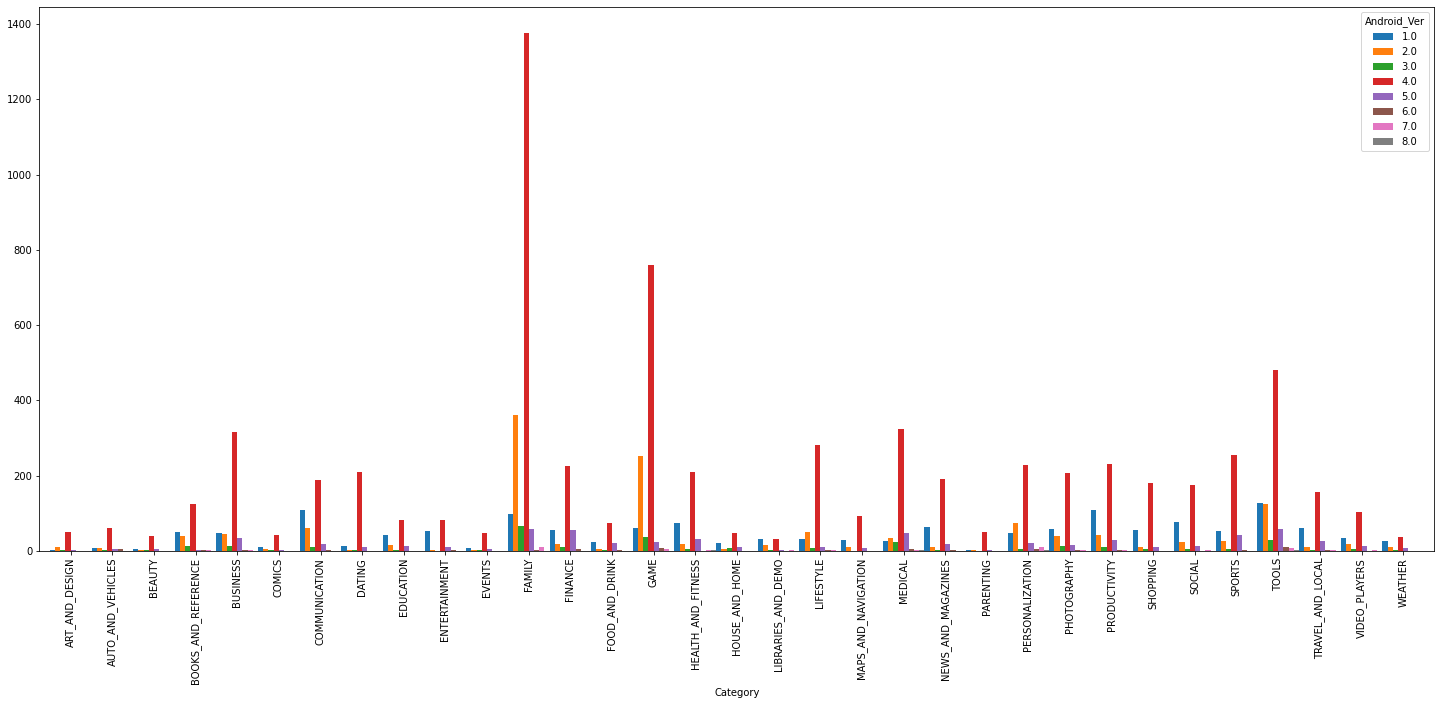

In [75]:
#plotting bar
category_version = playstore_df.groupby('Category')['Android_Ver'].value_counts().unstack().plot.bar(figsize=(25,10), width=1)
plt.show()

# **10.Effect of updation of app on their Ratings**

In [80]:
#Extracting update year from date
playstore_df["Update_year"] = playstore_df["Last_Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 

Text(0.5, 1.0, 'Update Year VS Rating')

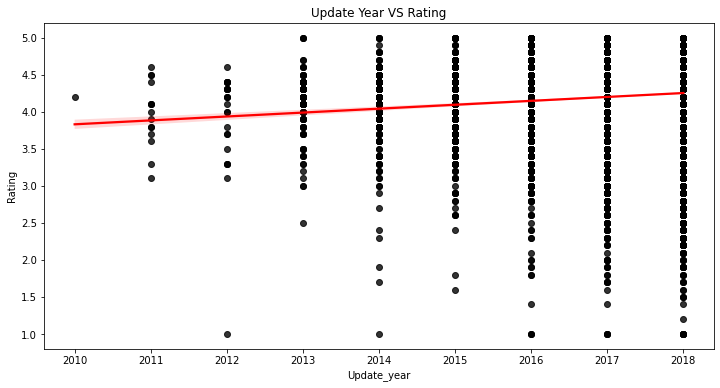

In [81]:
fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="Update_year", y="Rating", data=playstore_df,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("Update Year VS Rating")

# **11.Effect of price on Rating**

Text(0.5, 1.0, 'Price VS Rating')

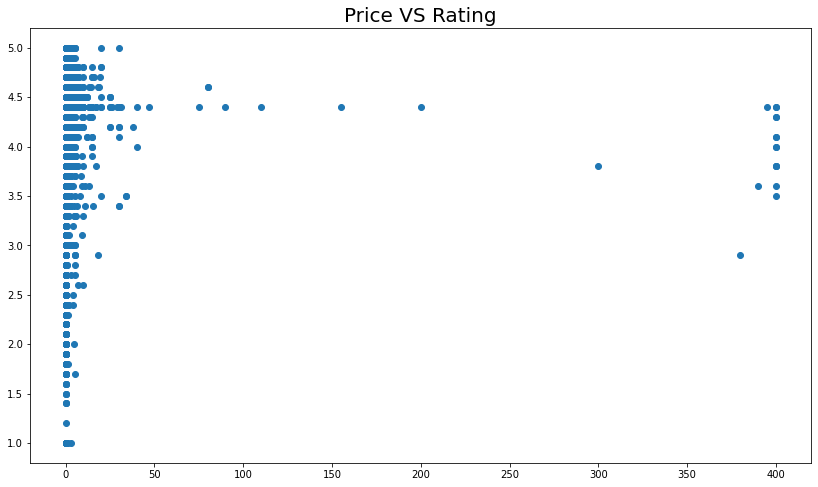

In [82]:
fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(x="Price", y="Rating", data=playstore_df)
plt.title("Price VS Rating", size=20)

# **12.Does number of installs depend on size of the app?**

Text(0.5, 0, 'size of apps')

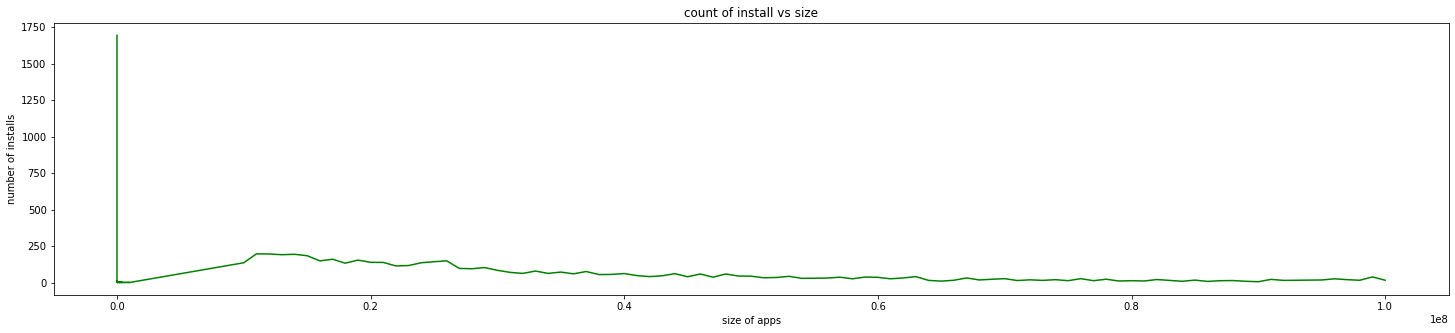

In [90]:
install_size=playstore_df.groupby(['Size'])['Installs'].count()
install_size.plot(figsize=(25,5),color='g')
plt.title('count of install vs size')
plt.ylabel('number of installs')
plt.xlabel('size of apps')

# **13.Finding correlation between play store data and user review data**

In [91]:
#copy of playstore data
x = playstore_df.copy() 
#copy of user review data
y = new_df_reviews.copy()

In [92]:
#merging 
merged_df1_review = pd.merge(x, y, how='inner', left_on='App', right_on='App')

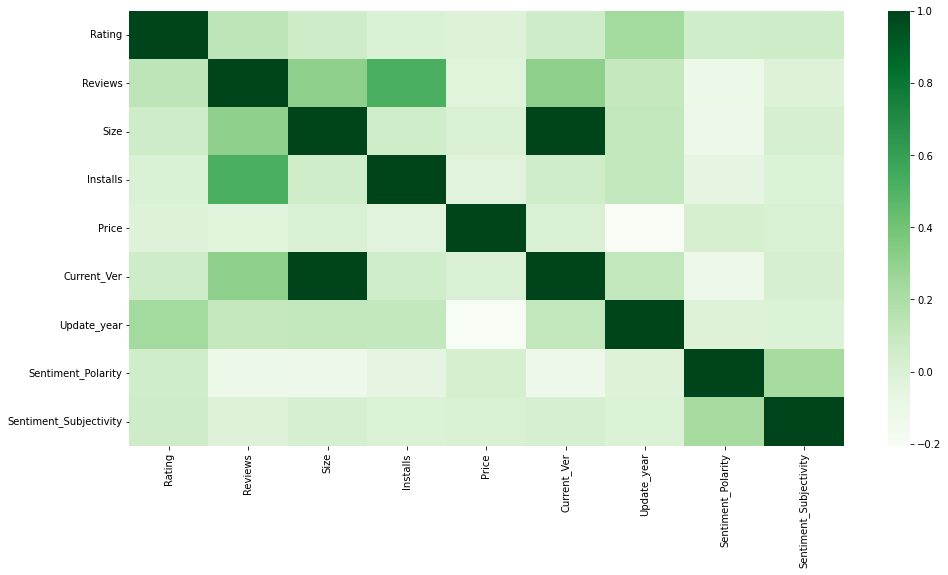

In [93]:
plt.figure(figsize=(16,8))
corr= merged_df1_review.corr()
sns.heatmap(corr,cmap='Greens')
plt.show()

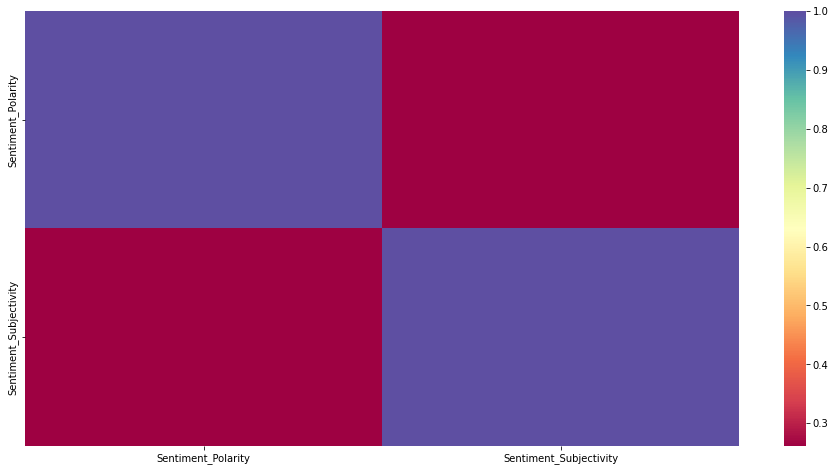

In [96]:
# Heat map for user_review
plt.figure(figsize=(16,8))
corr= new_df_reviews.corr()
sns.heatmap(corr,cmap='Spectral')
plt.show()

# **14.Average of subjectvity**
# 0-Objective(fact)
# 1-Subjective(opinion)

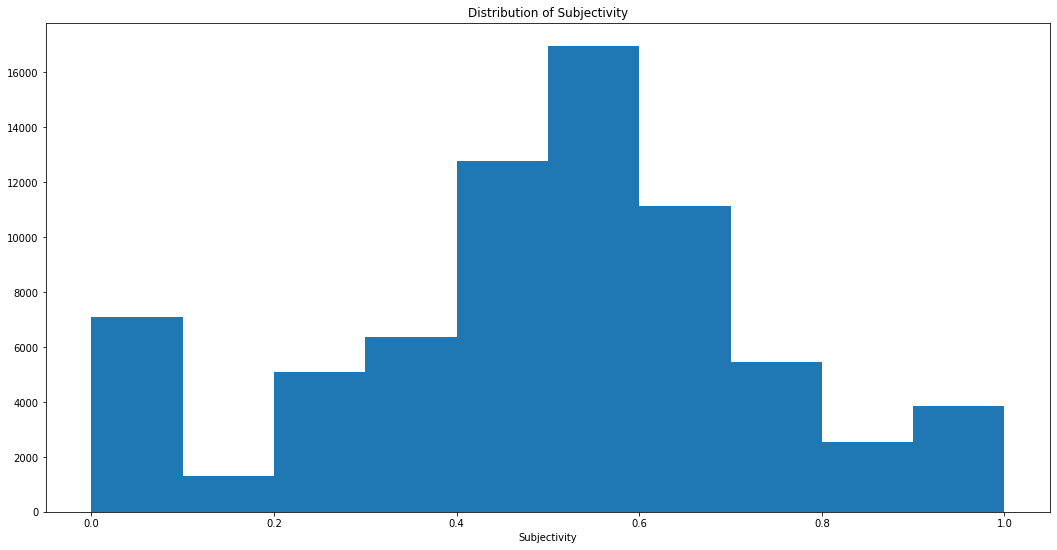

In [105]:
plt.figure(figsize=(18,9))
plt.hist(merged_df1_review[merged_df1_review['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")

plt.show()

# **15.Sentiment for free vs paid**

In [106]:
type_sentiment=merged_df1_review.groupby(['Type'])['Sentiment'].value_counts()

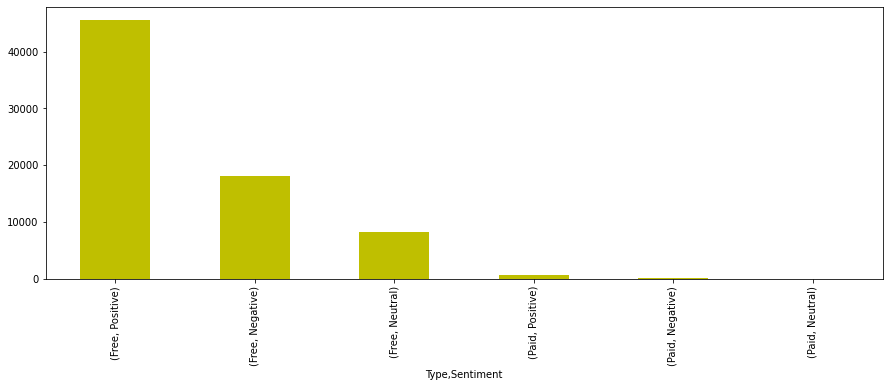

In [111]:
#Plotting bar for Sentiment Type for free vs paid
type_sentiment.plot.bar(figsize=(15,5),color='y')

# **16.Finding percentage of all Sentiment (reviews from the users)**

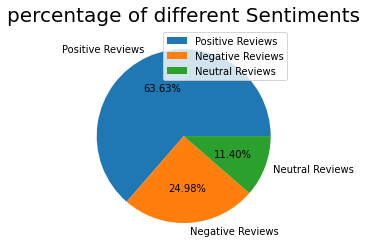

In [112]:
counts = list(merged_df1_review['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plt.pie(counts, labels=labels,autopct="%.2f%%")
plt.title('percentage of different Sentiments', fontsize=20)
plt.legend()
plt.show()

                                                             THE END